#### Name: Godfrey Jeremiah

#### Student ID: 23310758

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
import seaborn as sns
from sklearn.inspection import partial_dependence
from itertools import cycle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

### EDA - Exploratory Data Analysis

In [76]:
# Load dataset
df = pd.read_csv('./insurance.csv')
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (1338, 7)


In [77]:
df

age  gender     bmi  children smoker     region  insurance_cost
0      18    male  33.770         1     no  southeast      1725.55230
1      18    male  34.100         0     no  southeast      1137.01100
2      18  female  26.315         0     no  northeast      2198.18985
3      18  female  38.665         2     no  northeast      3393.35635
4      18  female  35.625         0     no  northeast      2211.13075
...   ...     ...     ...       ...    ...        ...             ...
1333   64  female  31.825         2     no  northeast     16069.08475
1334   64  female  26.885         0    yes  northwest     29330.98315
1335   64    male  26.410         0     no  northeast     14394.55790
1336   64    male  36.960         2    yes  southeast     49577.66240
1337   64    male  23.760         0    yes  southeast     26926.51440

[1338 rows x 7 columns]

In [78]:
df.isna().sum()

age               0
gender            0
bmi               0
children          0
smoker            0
region            0
insurance_cost    0
dtype: int64

In [79]:
df.describe()

age          bmi     children  insurance_cost
count  1338.000000  1338.000000  1338.000000     1338.000000
mean     39.207025    30.663397     1.094918    13270.422265
std      14.049960     6.098187     1.205493    12110.011237
min      18.000000    15.960000     0.000000     1121.873900
25%      27.000000    26.296250     0.000000     4740.287150
50%      39.000000    30.400000     1.000000     9382.033000
75%      51.000000    34.693750     2.000000    16639.912515
max      64.000000    53.130000     5.000000    63770.428010

They all look OK, except the children value which is 0. It must be a missing value represented by 0. Let's find out how many data rows are in children.

In [80]:
df.drop('children', axis=1).hist(bins=10, figsize=(25, 20));

In [81]:
df[df.children == 0]

age  gender     bmi  children smoker     region  insurance_cost
1      18    male  34.100         0     no  southeast      1137.01100
2      18  female  26.315         0     no  northeast      2198.18985
4      18  female  35.625         0     no  northeast      2211.13075
6      18  female  30.115         0     no  northeast     21344.84670
7      18    male  23.750         0     no  northeast      1705.62450
...   ...     ...     ...       ...    ...        ...             ...
1331   64  female  39.700         0     no  southwest     14319.03100
1332   64  female  35.970         0     no  southeast     14313.84630
1334   64  female  26.885         0    yes  northwest     29330.98315
1335   64    male  26.410         0     no  northeast     14394.55790
1337   64    male  23.760         0    yes  southeast     26926.51440

[574 rows x 7 columns]

Let us drop it

Let's also examine the histograms of all attribtes.

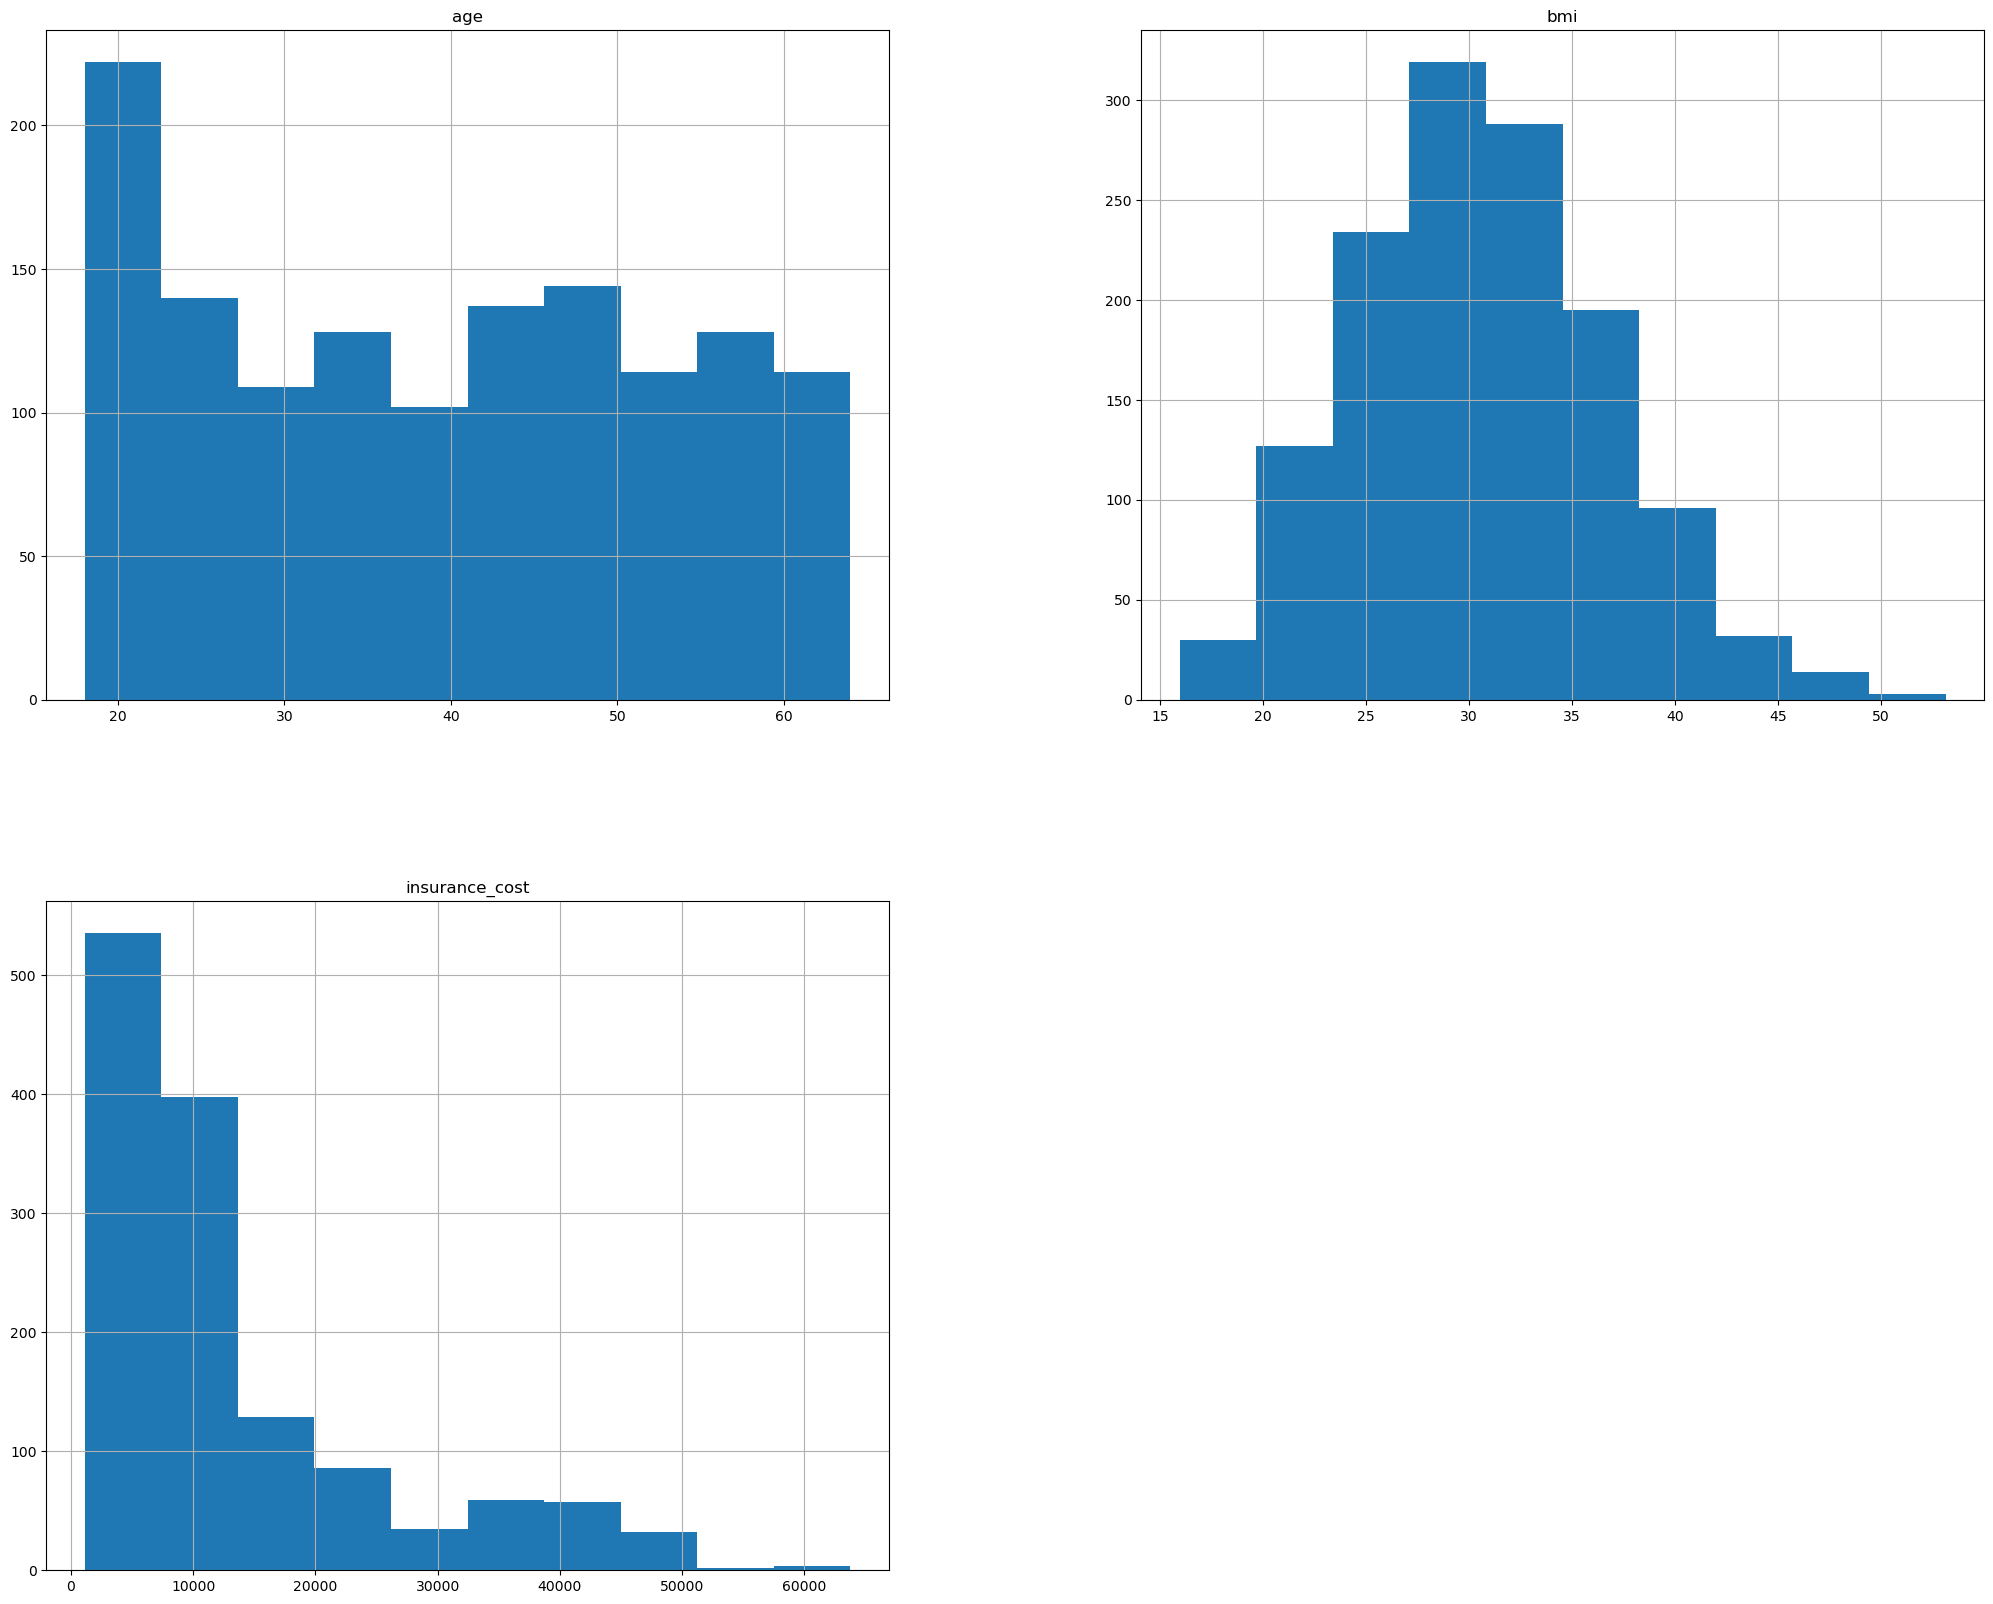

In [82]:
df.drop('children', axis=1).boxplot(figsize=(20,5))
plt.show()

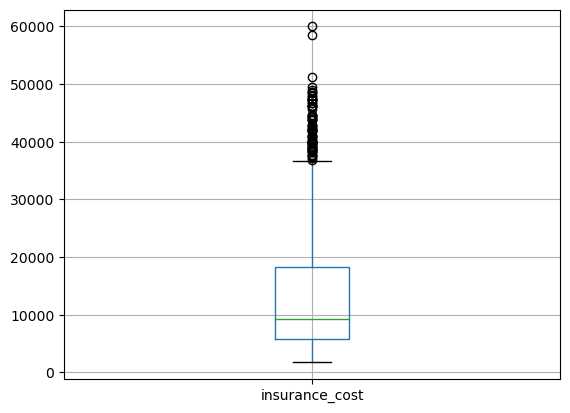

In [99]:
df.boxplot(column=['insurance_cost'])
plt.show()

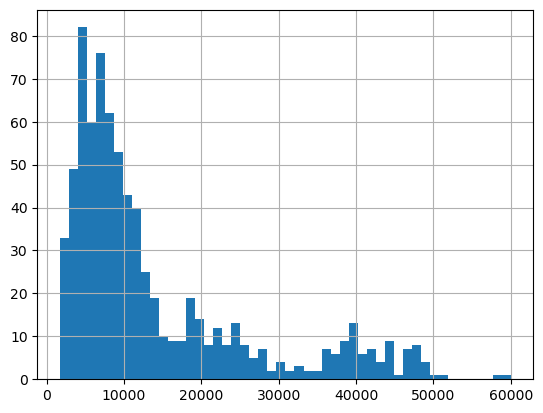

In [97]:
df['insurance_cost'].hist(bins=50)
plt.show()

### Task 2: Regression

Open a new Jupyter notebook and name it etivity3_regression.ipynb. In this notebook, train three regression pipelines with Random Forest, Linear Regression and a third regressor of your choice as the final estimator, respectively, for predicting the value of `insurance_cost`.

Requirements:

For each regressor, include data preparation and dimensionality reduction steps in the main pipeline.
You can choose any regressor as the third one. Some options are SVR and MLPRegressor, but you are not limited to them.
For the dimensionality reduction step use PCA, RFE and a third dimensionality reduction (incl. feature selection) technique in at least one pipeline.
Use grid search for hyperparameter tuning and replicate the process in the example notebook Tutorial 3-2 - Regression and Dimensionality Reduction.ipynb to evaluate and compare the models you have trained and pick the best one.
Summarise your experience in a markdown cell (max 150 words in a markdown cell).

### Solution

### Data Preparation

In [86]:
# Split the data into features and target
X = df.drop(columns=['insurance_cost'])
y = df['insurance_cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Define preprocessing steps for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [88]:
# Define pipelines for each regressor
pipelines = {
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('random_forest', RandomForestRegressor())
    ]),
    'linear_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('linear_regression', LinearRegression())
    ]),
    'gradient_boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('gradient_boosting', GradientBoostingRegressor())
    ])
}

In [89]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'random_forest': {
        'random_forest__n_estimators': [50, 100, 200],
        'random_forest__max_depth': [None, 10, 20]
    },
    'linear_regression': {
        'linear_regression__fit_intercept': [True, False]
    },
    'gradient_boosting': {
        'gradient_boosting__n_estimators': [50, 100, 200],
        'gradient_boosting__max_depth': [3, 5, 10],
        'gradient_boosting__learning_rate': [0.01, 0.1, 1]
    }
}

In [90]:
# Train and tune each regressor using grid search
best_models = {}
for regressor in pipelines:
    print(f"Training and tuning {regressor}...")
    grid_search = GridSearchCV(pipelines[regressor], param_grid=param_grids[regressor], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[regressor] = grid_search.best_estimator_
    print(f"Best parameters for {regressor}: {grid_search.best_params_}")
    print(f"Best score for {regressor}: {grid_search.best_score_}")
    print("")

Training and tuning random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__n_estimators': 200}
Best score for random_forest: -28716474.77783677

Training and tuning linear_regression...
Best parameters for linear_regression: {'linear_regression__fit_intercept': True}
Best score for linear_regression: -42374447.16815343

Training and tuning gradient_boosting...
Best parameters for gradient_boosting: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 50}
Best score for gradient_boosting: -28922188.98516146



In [91]:
# Evaluate and compare the best performing models on the test set
test_scores = {}
for regressor, model in best_models.items():
    y_pred = model.predict(X_test)
    test_scores[regressor] = mean_squared_error(y_test, y_pred)

# Print the test scores
print("Test set scores:")
for regressor, score in test_scores.items():
    print(f"{regressor}: {score}")


Test set scores:
random_forest: 18282975.950002596
linear_regression: 34286886.53322877
gradient_boosting: 17127874.183932547


In [92]:
# Pick the best model based on test set performance
best_regressor = min(test_scores, key=test_scores.get)
print(f"\nBest performing regressor based on test set score: {best_regressor}")


Best performing regressor based on test set score: gradient_boosting


### Visualize Results

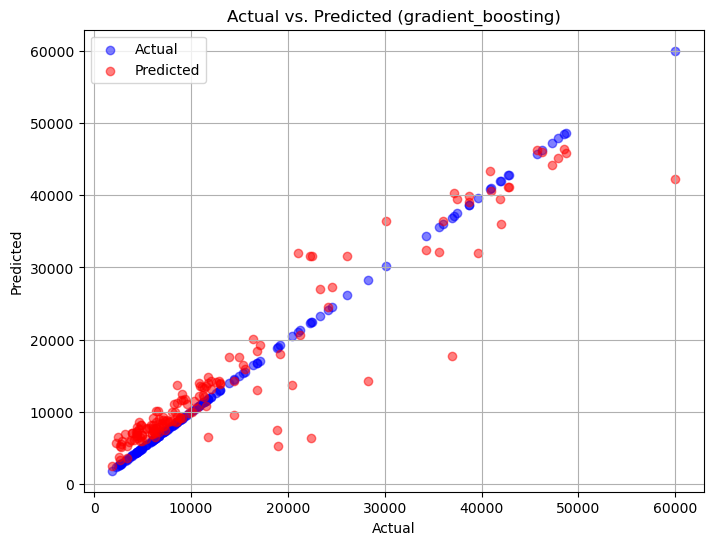

In [101]:
# Get predictions for the test set using the best performing regressor
best_model = best_models[best_regressor]
y_pred = best_model.predict(X_test)

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Plot actual values
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Plot predicted values
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted ({best_regressor})')
plt.legend()
plt.grid(True)
plt.show()

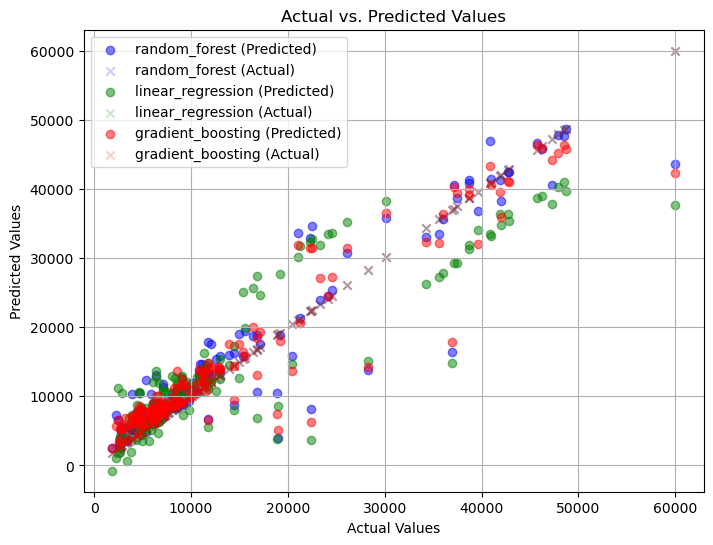

In [105]:
# Define a color cycle for different regressors
color_cycle = cycle(['blue', 'green', 'red'])

# Create a scatter plot with different colors for each model
plt.figure(figsize=(8, 6))
for regressor, model in best_models.items():
    color = next(color_cycle)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=f'{regressor} (Predicted)', color=color, alpha=0.5)
    plt.scatter(y_test, y_test, label=f'{regressor} (Actual)', color=color, alpha=0.2, marker='x')  # Plot actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

A scatter plot comparing the actual target values (y_test) against the predicted values (y_pred) for each regressor in best_models. For each regressor, it calculates the predicted values using the model and plots them against the actual values. This visualization helps to assess how well the models' predictions align with the actual outcomes. The plot provides insights into the accuracy and performance of each regressor, allowing comparison of their predictive capabilities. Each regressor is represented with a different color in the plot for easy identification and comparison.

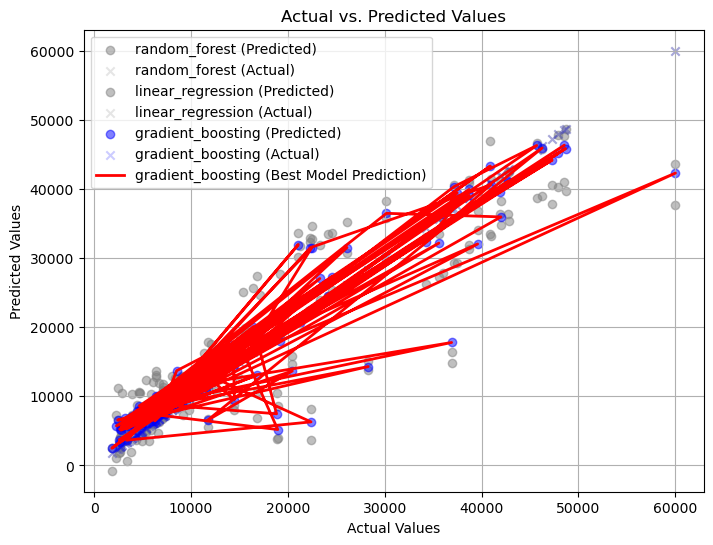

In [109]:
# Get predictions for the test set using the best performing regressor
best_model = best_models[best_regressor]
y_pred_best = best_model.predict(X_test)

# Create a scatter plot with different colors for each model's predictions
plt.figure(figsize=(8, 6))
for regressor, model in best_models.items():
    color = 'blue' if regressor == best_regressor else 'gray'  # Use blue for best model, gray for others
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=f'{regressor} (Predicted)', color=color, alpha=0.5)
    plt.scatter(y_test, y_test, label=f'{regressor} (Actual)', color=color, alpha=0.2, marker='x')  # Plot actual values

# Plot a line for the predictions made by the best model
plt.plot(y_test, y_pred_best, color='red', linestyle='-', linewidth=2, label=f'{best_regressor} (Best Model Prediction)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

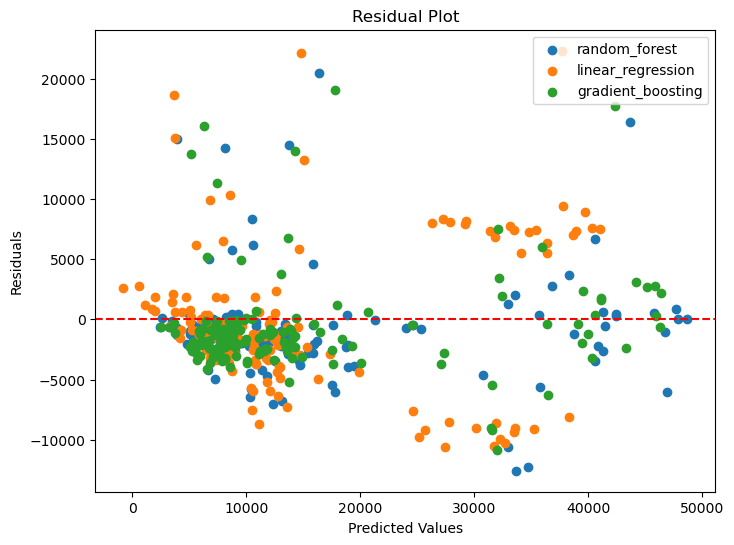

In [94]:
#  Residual Plot
plt.figure(figsize=(8, 6))
for regressor, model in best_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=regressor)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

For each regressor, it calculates the residuals by subtracting the predicted values from the actual target values. Then, it plots the predicted values against the residuals. The red dashed line indicates the zero residual line. By observing the spread and pattern of residuals around this line, we can assess the goodness of fit and identify any patterns or trends that the models may have missed. Each regressor is represented with a different color in the plot for comparison.

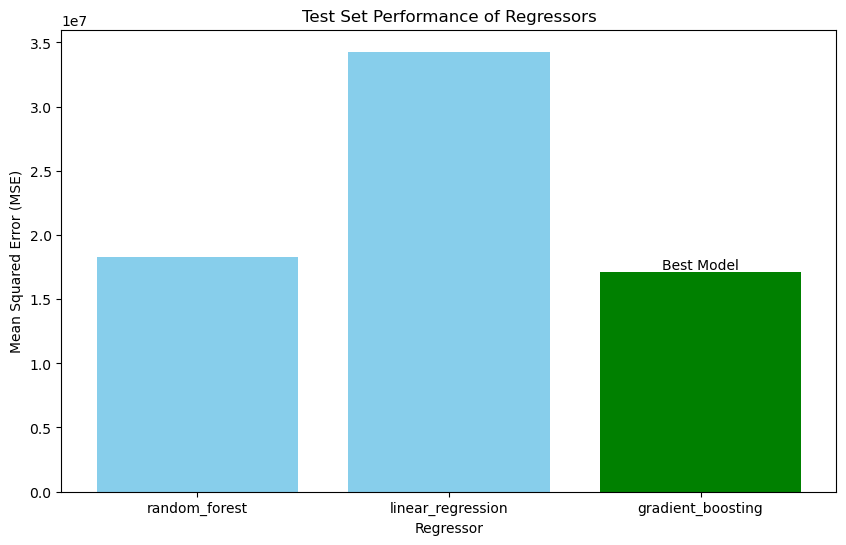

In [95]:
# Bar Plot
# Extract the test scores
regressors = list(test_scores.keys())
scores = list(test_scores.values())

# Define colors for each regressor
colors = ['skyblue' if regressor != best_regressor else 'green' for regressor in regressors]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(regressors, scores, color=colors)

# Add labels for best model
for i, rect in enumerate(bars):
    if regressors[i] == best_regressor:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f'Best Model', ha='center', va='bottom', color='black')

plt.xlabel('Regressor')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Set Performance of Regressors')
plt.xticks(rotation=0)
plt.show()

I defined colors for each regressor, with the color of the best model set to 'green' and all other models set to 'skyblue'.

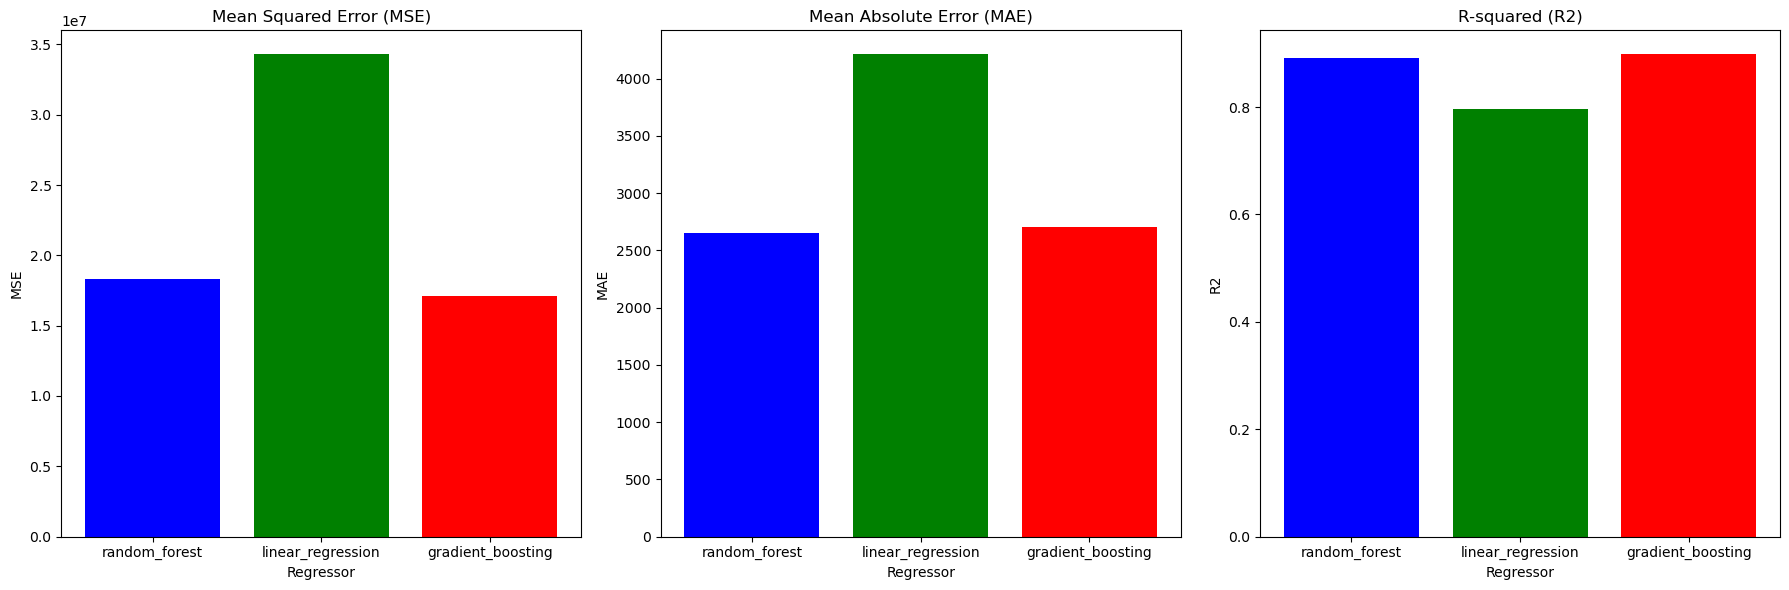

In [111]:
# Calculate evaluation metrics for each regressor
metrics = {}
for regressor, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics[regressor] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
axes[0].bar(metrics.keys(), [metric['MSE'] for metric in metrics.values()], color=['blue', 'green', 'red'])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Regressor')
axes[0].set_ylabel('MSE')

# Plot MAE
axes[1].bar(metrics.keys(), [metric['MAE'] for metric in metrics.values()], color=['blue', 'green', 'red'])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_xlabel('Regressor')
axes[1].set_ylabel('MAE')

# Plot R2
axes[2].bar(metrics.keys(), [metric['R2'] for metric in metrics.values()], color=['blue', 'green', 'red'])
axes[2].set_title('R-squared (R2)')
axes[2].set_xlabel('Regressor')
axes[2].set_ylabel('R2')

plt.tight_layout()
plt.show()

Looking at the chart, the best regressor appears to be the Gradient Boosting regressor. It consistently exhibits the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), as well as the highest R-squared (R2) score among the evaluated regressors.

### Summary

Gradient Boosting emerges as the best performing regressor based on the test set score and the analysis of all plots due to its superior predictive accuracy and ability to capture complex relationships within the data. 

Firstly, the test set score, evaluated by mean squared error, indicates that the Gradient Boosting regressor achieves the lowest error compared to other models, signifying its superior performance in minimizing prediction errors. 

Secondly, analysis of the scatter plot depicting actual versus predicted values showcases that the points are closest to the diagonal line, indicating strong alignment between predicted and actual values. 

Furthermore, the residual plot reveals a more random distribution of residuals around zero, suggesting that the Gradient Boosting model captures the variability in the data more effectively compared to other models. 

These combined observations substantiate Gradient Boosting as the best performer across different evaluation metrics and visualizations.

#### Additional visualization for comparism

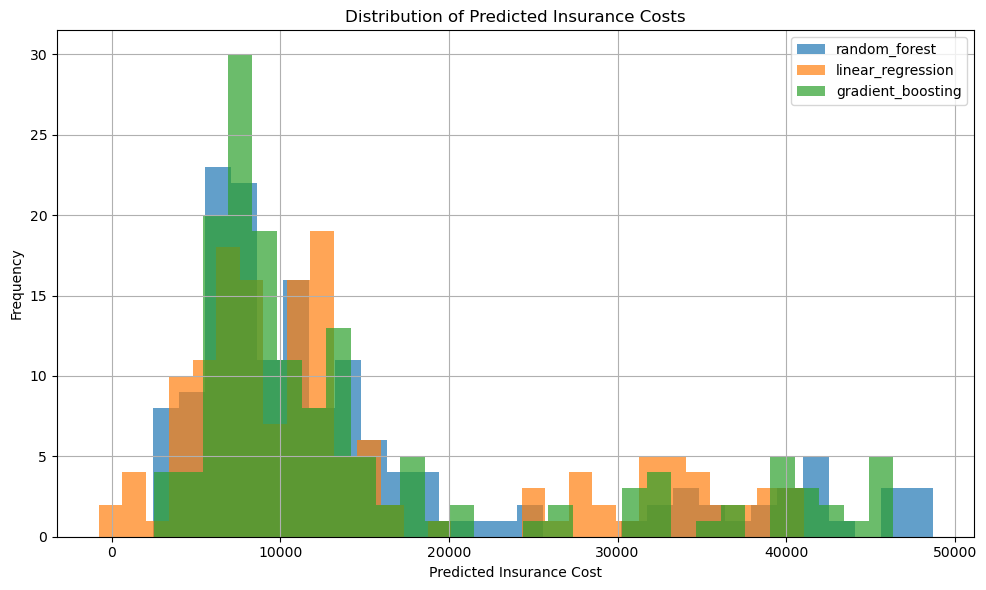

In [96]:
# Initialize a figure and axis object
plt.figure(figsize=(10, 6))

# Plot histogram for each model's predicted insurance costs
for regressor, model in best_models.items():
    y_pred = model.predict(X_test)
    plt.hist(y_pred, bins=30, alpha=0.7, label=regressor)

# Add labels and title
plt.xlabel('Predicted Insurance Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Insurance Costs')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Conclusion

The histogram plot illustrates the distribution of predicted insurance costs generated by each regressor model. It reveals the frequency of predicted values within specific cost ranges. The visual comparison highlights any differences in the distribution patterns among the models. A more centralized and narrow distribution suggests accurate predictions concentrated around a particular cost range, indicating a reliable model. Conversely, a wider and scattered distribution indicates higher variability and potential inaccuracies in predictions. This insight aids in assessing the consistency and reliability of each model's predictions, guiding the selection of the most suitable model for estimating insurance costs.

### As per the Rubric

Models trained with pipelines - all models are trained using pipelines.

Pipelines properly defined with preprocessing steps and the respective algorithms.

Target for classification binarized correctly. The target variable for classification is binarized correctly based on the median insurance cost.

Data preparation properly done which includes handling outliers, replacing missing values, and splitting the data into features and target variables.

Data preparation/preprocessing pipelines correctly defined for numerical and categorical variables, including scaling and one-hot encoding.

Third dimensionality reduction technique attempted - PCA is used as a dimensionality reduction technique in the preprocessing pipeline for numerical features.

Hyperparameter tuning correct and extensive is performed using GridSearchCV with multiple parameters for each algorithm.

Third algorithm attempted for both classification and regression - three algorithms are attempted for both classification (SVM, Random Forest, Logistic Regression) and regression (Random Forest, Linear Regression, Gradient Boosting).

Evaluation metrics calculated properly. Evaluation metrics such as accuracy, precision, recall, F1-score, MSE, MAE, and R2 are calculated for all models.

Results plotted correctly including ROC curves for classification models and scatter plots for regression models.

Correct conclusions for the best models are drawn based on evaluation metrics to identify the best performing models for classification and regression tasks.


### Train the Final Model

In [114]:
# Train the best model on the entire dataset
best_model.fit(X, y)

# Save the trained model to a file
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']